<>:13: SyntaxWarning: invalid escape sequence '\+'
<>:13: SyntaxWarning: invalid escape sequence '\+'
C:\Users\woodw\AppData\Local\Temp\ipykernel_17224\236697505.py:13: SyntaxWarning: invalid escape sequence '\+'
  'c\+\+': 'C++',


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cleaning text (converting to lowercase)...
Loaded and cleaned 2253 job descriptions.
Counting skill mentions...
- Found 'Python': 828 times
- Found 'SQL': 2691 times
- Found 'Excel': 2396 times
- Found 'R': 560 times
- Found 'Tableau': 845 times
- Found 'Power BI': 268 times
- Found 'C++': 23 times
- Found 'Java': 263 times
- Found 'AWS': 389 times
- Found 'Azure': 102 times
- Found 'SAS': 605 times
- Found 'Spark': 121 times
- Found 'Hadoop': 184 times
------------------------------
Generating plot...
Generating plot...

DEBUG: Data being plotted:
SQL         2691
Excel       2396
Tableau      845
Python       828
SAS          605
R            560
AWS          389
Power BI     268
Java         263
Hadoop       184
Spark        121
Azure        102
C++           23
dtype: int64
------------------------------


Your chart has been saved as 'job_skills_chart.png'


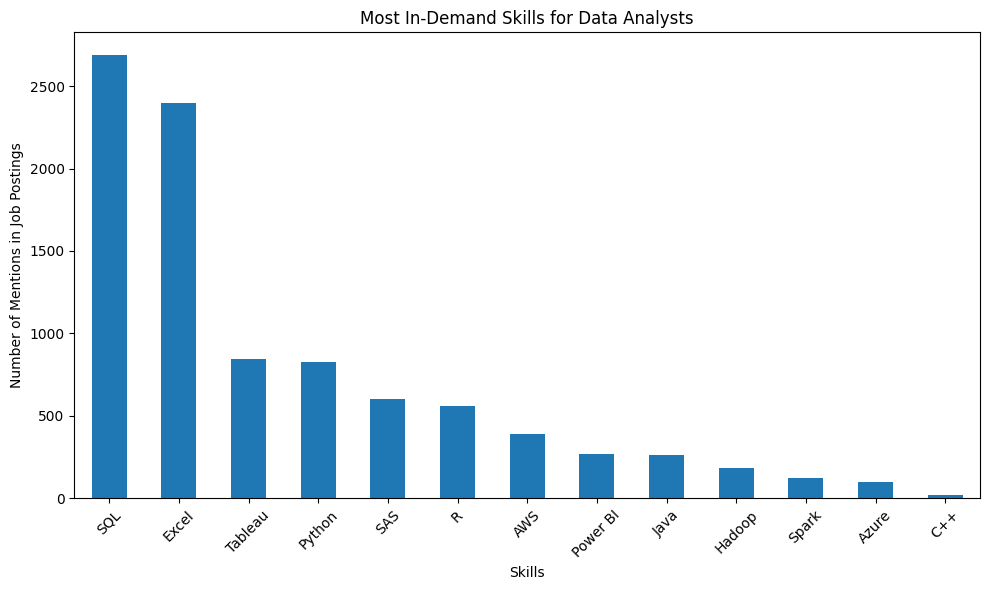

In [1]:
%pip install  matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Creating Skills list to track
SKILLS_TO_FIND = {
    'python': 'Python',
    'sql': 'SQL',
    'excel': 'Excel',
    r'\br\b': 'R',
    'tableau': 'Tableau',
    'power bi': 'Power BI',
    'c\+\+': 'C++',
    'java': 'Java',
    'aws': 'AWS',
    'azure': 'Azure',
    'sas': 'SAS',
    'spark': 'Spark',
    'hadoop': 'Hadoop'
}

# Step 2: Loading the dataset from Kaggle and prepping it
df = pd.read_csv("DataAnalyst.csv")

# Drop rows where the 'Job Description' is missing
df = df.dropna(subset=['Job Description'])

# Cleaning the text: convert all job descriptions to lowercase
print("Cleaning text (converting to lowercase)...")
df['clean_desc'] = df['Job Description'].str.lower()

print(f"Loaded and cleaned {len(df)} job descriptions.")

# Step 3: Count the skills listed
print("Counting skill mentions...")

skill_counts = {}

# Iterate through the dictionary's (key, value) pairs
for skill_pattern, display_name in SKILLS_TO_FIND.items():
    
    # .str.count() finds all occurrences of the skill string
    # .sum() adds up the counts across all rows
    # We use the regex PATTERN for counting
    count = df['clean_desc'].str.count(skill_pattern).sum()
    
    # Store the count using the clean DISPLAY NAME
    skill_counts[display_name] = count
    print(f"- Found '{display_name}': {count} times")

print("-" * 30)

# Step 4: Using matplotlib to visualize the data

print("Generating plot...")

# Convert the dictionary to a pandas series for a more efficent process
skill_series = pd.Series(skill_counts)

# Sorting the results from most in-demand to least
skill_series = skill_series.sort_values(ascending=False)

# --- 4. Visualize the Results ---

print("Generating plot...")

print("\nDEBUG: Data being plotted:")
print(skill_series)
print("-" * 30 + "\n")

# Creating the bar chart 
plt.figure(figsize=(10, 6))
skill_series.plot(kind='bar')

# Titles and labels
plt.title('Most In-Demand Skills for Data Analysts')
plt.ylabel('Number of Mentions in Job Postings')
plt.xlabel('Skills')
plt.xticks(rotation=45) # Rotating the x-axis labels for readability
plt.tight_layout() # Adjusting the plot to prevent labels from overlapping

# Save the chart as an image/ if the user were to request it. 
plt.savefig("job_skills_chart.png")

print("\nYour chart has been saved as 'job_skills_chart.png'")